In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [262]:
print("radha")

radha


In [263]:
from sklearn.datasets import load_iris

In [264]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
print(df.shape)
df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [266]:
df = df[df.target != 0][['sepal width (cm)', 'petal length (cm)', 'target']]
df.head()

,sepal width (cm),petal length (cm),target
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


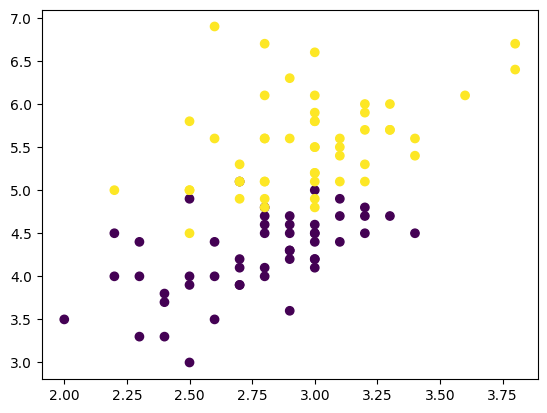

In [267]:
plt.scatter(df['sepal width (cm)'], df['petal length (cm)'], c=df['target'])
plt.show()

In [268]:
# 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val  = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [269]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

## **CASE1:Bagging**

In [270]:
df_train.sample(2,replace=True)

,sepal width (cm),petal length (cm),target
122,2.8,6.7,2
136,3.4,5.6,2


In [271]:
# data for tree 1
df_bag = df_train.sample(8,replace=True)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,sepal width (cm),petal length (cm),target
85,3.4,4.5,1
52,3.1,4.9,1
67,2.7,4.1,1
61,3.0,4.2,1
60,2.0,3.5,1
61,3.0,4.2,1
85,3.4,4.5,1
122,2.8,6.7,2


In [272]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

In [273]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf,filled=True,feature_names=['sepal width (cm)', 'petal length (cm)'], class_names=['verginica','versicolor'])
    plt.show()
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [274]:
dt_bag1 = DecisionTreeClassifier()

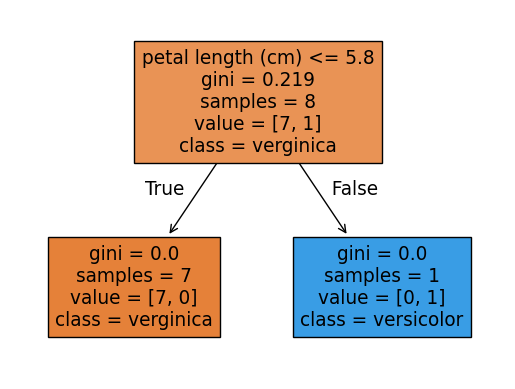

0.8


c:\Users\AMAN CHOUDHARY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [275]:
evaluate(dt_bag1,X,y)

In [276]:
# data for tree 2   
df_bag = df_train.sample(8,replace=True)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,sepal width (cm),petal length (cm),target
85,3.4,4.5,1
61,3.0,4.2,1
136,3.4,5.6,2
122,2.8,6.7,2
136,3.4,5.6,2
67,2.7,4.1,1
126,2.8,4.8,2
136,3.4,5.6,2


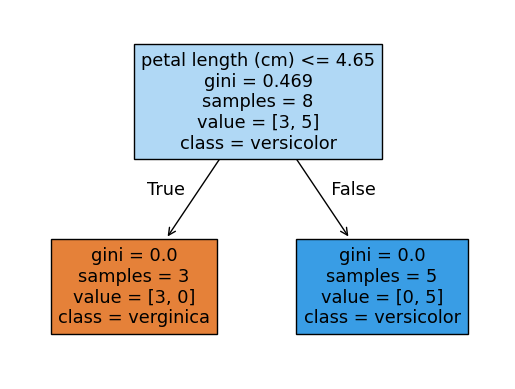

1.0


c:\Users\AMAN CHOUDHARY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [277]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [283]:
# data for tree 3
df_bag = df_train.sample(8,replace=True)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

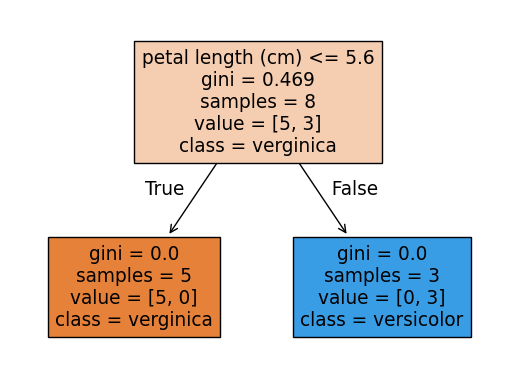

0.8


c:\Users\AMAN CHOUDHARY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [279]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

predictions

In [281]:
df_test

,sepal width (cm),petal length (cm),target
57,2.4,3.3,1
100,3.3,6.0,2
109,3.6,6.1,2
88,3.0,4.1,1
96,2.9,4.2,1


In [288]:
np.array([2.4,3.3]).reshape(1,2)

array([[2.4, 3.3]])

In [295]:
print("predictor 1 " , dt_bag1.predict(np.array([2.9,4.2]).reshape(1,2)))
print("predictor 2 " , dt_bag2.predict(np.array([2.9,4.2]).reshape(1,2)))
print("predictor 3 " , dt_bag3.predict(np.array([2.9,4.2]).reshape(1,2)))

predictor 1  [1]
predictor 2  [1]
predictor 3  [1]


c:\Users\AMAN CHOUDHARY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\AMAN CHOUDHARY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\AMAN CHOUDHARY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [292]:
print("predictor 1 " , dt_bag1.predict(np.array([3.3,6.0]).reshape(1,2)))
print("predictor 2 " , dt_bag2.predict(np.array([3.3,6.0]).reshape(1,2)))
print("predictor 3 " , dt_bag3.predict(np.array([3.3,6.0]).reshape(1,2)))

predictor 1  [2]
predictor 2  [2]
predictor 3  [2]


c:\Users\AMAN CHOUDHARY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\AMAN CHOUDHARY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\AMAN CHOUDHARY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### **pasting**

# similar to above row sampling but without replacement